In [ ]:
!pip install git+https://github.com/intel/openfl.git
!pip install -r https://raw.githubusercontent.com/intel/openfl/develop/openfl-tutorials/experimental/requirements_workflow_interface.txt
import os
os.environ["USERNAME"] = "colab"
!pip install rarfile

  Cloning https://github.com/intel/openfl.git to /tmp/pip-req-build-8_6om5ym
  Running command git clone --filter=blob:none --quiet https://github.com/intel/openfl.git /tmp/pip-req-build-8_6om5ym
  Resolved https://github.com/intel/openfl.git to commit d4108fb49b2d932d3647b12a370e42a0231cbc40
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.2/380.2 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.0/864.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 94.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.6/510.6 kB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 97.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 91.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.2/275.2 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.3/92.3 kB 12.7 MB/s eta 0:00:00
  Attempting uninsta

In [1]:
!gdown '1g1uCwXvXM9KVX977KTl_3iIvjINXaY8S'

Downloading...
From: https://drive.google.com/uc?id=1g1uCwXvXM9KVX977KTl_3iIvjINXaY8S
To: /content/64x64.rar
100% 56.4M/56.4M [00:01<00:00, 42.7MB/s]


In [ ]:
import rarfile

rar_path = '/content/64x64.rar'

# Giải nén tệp .rar
with rarfile.RarFile(rar_path, 'r') as rf:
    rf.extractall('/content/data')

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split, ConcatDataset
from torchvision import transforms
from torchvision.datasets import ImageFolder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

batch_size_train = 64
batch_size_test = 64
log_interval = 5
seed = 18
torch.manual_seed(seed)
torch.backends.cudnn.enabled = False


# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.dataset = ImageFolder(root_dir, transform=transform)

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        return self.dataset[idx]
# Define transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset
datasetfull = CustomDataset(root_dir='/content/data/64x64', transform=transform)

# Load 50% dataset
desired_size = int(0.5 * len(datasetfull))
remaining_size = len(datasetfull) - desired_size
dataset, _ = random_split(datasetfull, [desired_size, remaining_size], generator=torch.Generator().manual_seed(seed))

# Split dataset into train and validation sets
train_size = int(0.7 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size], generator=torch.Generator().manual_seed(seed))
trainloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
testloader = DataLoader(val_dataset, batch_size=64, shuffle=False)


In [ ]:
# Chia dataset thành 3 subset theo 5 nhãn
def split_dataset_by_labels(dataset, labels):
    selected_indices = [i for i in range(len(dataset)) if dataset[i][1] == labels]
    return torch.utils.data.Subset(dataset, selected_indices)

subset_0 = split_dataset_by_labels(dataset, 0)
subset_1 = split_dataset_by_labels(dataset, 1)
subset_2 = split_dataset_by_labels(dataset, 2)
subset_3 = split_dataset_by_labels(dataset, 3)
subset_4 = split_dataset_by_labels(dataset, 4)

In [ ]:
# Chia từng subset thành các bộ dữ liệu theo tỷ lệ
split_subset_0 = random_split(subset_0, [int(len(subset_0)*0.8), 0, len(subset_0) - int(len(subset_0)*0.8)], generator=torch.Generator().manual_seed(seed))
split_subset_1 = random_split(subset_1, [int(len(subset_1)*0.2), len(subset_1) - int(len(subset_1)*0.2), 0], generator=torch.Generator().manual_seed(seed))
split_subset_2 = random_split(subset_2, [int(len(subset_2)*0.1), int(len(subset_2)*0.2), len(subset_2) - int(len(subset_2)*0.1) - int(len(subset_2)*0.2)], generator=torch.Generator().manual_seed(seed))
split_subset_3 = random_split(subset_3, [0, int(len(subset_3)*0.1), len(subset_3) - int(len(subset_3)*0.1)], generator=torch.Generator().manual_seed(seed))
split_subset_4 = random_split(subset_4, [int(len(subset_4)*0.2), int(len(subset_4)*0.5), len(subset_4) - int(len(subset_4)*0.5) - int(len(subset_4)*0.2)], generator=torch.Generator().manual_seed(seed))

#Xây dựng dataset cho các node
final_subset_A = ConcatDataset([split_subset_0[0], split_subset_1[0], split_subset_2[0], split_subset_3[0], split_subset_4[0]])
final_subset_B = ConcatDataset([split_subset_0[1], split_subset_1[1], split_subset_2[1], split_subset_3[1], split_subset_4[1]])
final_subset_C = ConcatDataset([split_subset_0[2], split_subset_1[2], split_subset_2[2], split_subset_3[2], split_subset_4[2]])


In [ ]:
#Chia dataset tại các node thành training set và validation set
train_sizeA = int(0.7 * len(final_subset_A))
val_sizeA = len(final_subset_A) - train_sizeA
trainA, valA = torch.utils.data.random_split(final_subset_A, [train_sizeA, val_sizeA], generator=torch.Generator().manual_seed(seed))

train_sizeB = int(0.7 * len(final_subset_B))
val_sizeB = len(final_subset_B) - train_sizeB
trainB, valB = torch.utils.data.random_split(final_subset_B, [train_sizeB, val_sizeB], generator=torch.Generator().manual_seed(seed))

train_sizeC = int(0.7 * len(final_subset_C))
val_sizeC = len(final_subset_C) - train_sizeC
trainC, valC = torch.utils.data.random_split(final_subset_C, [train_sizeC, val_sizeC], generator=torch.Generator().manual_seed(seed))


train_loaderA = DataLoader(trainA, batch_size=64, shuffle=True)
val_loaderA = DataLoader(valA, batch_size=64, shuffle=False)

train_loaderB = DataLoader(trainB, batch_size=64, shuffle=True)
val_loaderB = DataLoader(valB, batch_size=64, shuffle=False)

train_loaderC = DataLoader(trainC, batch_size=64, shuffle=True)
val_loaderC = DataLoader(valC, batch_size=64, shuffle=False)

In [ ]:
# Define model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=5, stride=1)
        self.pool = nn.MaxPool2d(2, stride=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 59 * 59, 500)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(500, 5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


def inference(network, test_loader):
    if torch.cuda.is_available():
        network = network.to('cuda:0')
    network.eval()
    criterion = nn.CrossEntropyLoss()
    test_loss = 0
    correct = 0
    total_samples_val = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
          if torch.cuda.is_available():
                inputs = inputs.to('cuda:0')
                labels = labels.to('cuda:0')
          outputs = network(inputs)
          test_loss += criterion(outputs, labels).item()
          _, predicted_val = torch.max(outputs.data, 1)
          total_samples_val += labels.size(0)
          correct += (predicted_val == labels).sum().item()

    test_loss /= total_samples_val
    accuracy = correct / total_samples_val

    print('\nTest set: loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, total_samples_val, 100. * accuracy))

    return accuracy


In [ ]:
#Evaluate
class_names = ["Adware", "Banking Malware", "Mobile Riskware", "SMS Malware", "Benign"]

def evaluate_model(network, test_loader):
    if torch.cuda.is_available():
        network = network.to('cuda:0')
    network.eval()

    all_predicted = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            if torch.cuda.is_available():
                inputs = inputs.to('cuda:0')
                labels = labels.to('cuda:0')

            outputs = network(inputs)
            _, predicted_val = torch.max(outputs.data, 1)

            all_predicted.extend(predicted_val.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    precision = precision_score(all_labels, all_predicted, average='weighted')
    recall = recall_score(all_labels, all_predicted, average='weighted')
    f1 = f1_score(all_labels, all_predicted, average='weighted')

    print('Precision: {:.4f}'.format(precision))
    print('Recall: {:.4f}'.format(recall))
    print('F1 Score: {:.4f}'.format(f1))

    # Classification report provides precision, recall, and F1-score for each class
    print('\nClassification Report:')
    print(classification_report(all_labels, all_predicted))


    cm = confusion_matrix(all_labels, all_predicted)

    plt.figure(figsize=(len(class_names), len(class_names)))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


##Centralized Learning

In [ ]:
# Initialize model
modelA = MyModel()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelA.parameters(), lr=0.001)

# Train the model on dataset A
num_epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelA.to(device)

for epoch in range(num_epochs):
    modelA.train()
    total_correct = 0
    total_samples = 0

    for inputs, labels in train_loaderA:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = modelA(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()

    # Training accuracy
    train_accuracy = total_correct / total_samples

    # Validation loop
    modelA.eval()
    total_correct_val = 0
    total_samples_val = 0

    with torch.no_grad():
        for inputs, labels in val_loaderA:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = modelA(inputs)
            val_loss = criterion(outputs, labels)

            _, predicted_val = torch.max(outputs.data, 1)
            total_samples_val += labels.size(0)
            total_correct_val += (predicted_val == labels).sum().item()

    # Validation accuracy
    val_accuracy = total_correct_val / total_samples_val

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, '
          f'Train Accuracy: {train_accuracy * 100:.2f}%, Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy * 100:.2f}')


Epoch [1/5], Loss: 2.5758, Train Accuracy: 43.34%, Val Loss: 3.4170, Val Accuracy: 63.66
Epoch [2/5], Loss: 0.9219, Train Accuracy: 64.61%, Val Loss: 0.4777, Val Accuracy: 81.02
Epoch [3/5], Loss: 0.5453, Train Accuracy: 81.41%, Val Loss: 0.4354, Val Accuracy: 84.49
Epoch [4/5], Loss: 0.2477, Train Accuracy: 88.07%, Val Loss: 0.2686, Val Accuracy: 85.42
Epoch [5/5], Loss: 0.5678, Train Accuracy: 91.45%, Val Loss: 0.2509, Val Accuracy: 86.34


In [ ]:
# Validation loop on general validation set
modelA.eval()
total_correct_val = 0
total_samples_val = 0
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = modelA(inputs)
        val_loss = criterion(outputs, labels)
        _, predicted_val = torch.max(outputs.data, 1)
        total_samples_val += labels.size(0)
        total_correct_val += (predicted_val == labels).sum().item()
# Calculate validation accuracy
val_accuracy = total_correct_val / total_samples_val
print(f'Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy * 100:.2f}')

Val Loss: 6.2985, Val Accuracy: 54.07


In [ ]:
# Initialize model
modelB = MyModel()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelB.parameters(), lr=0.001)

# Train the model on dataset B
num_epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelB.to(device)

for epoch in range(num_epochs):
    modelB.train()
    total_correct = 0
    total_samples = 0

    for inputs, labels in train_loaderB:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = modelB(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()

    # Training accuracy
    train_accuracy = total_correct / total_samples

    # Validation loop
    modelB.eval()
    total_correct_val = 0
    total_samples_val = 0

    with torch.no_grad():
        for inputs, labels in val_loaderB:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = modelB(inputs)
            val_loss = criterion(outputs, labels)

            _, predicted_val = torch.max(outputs.data, 1)
            total_samples_val += labels.size(0)
            total_correct_val += (predicted_val == labels).sum().item()

    # Validation accuracy
    val_accuracy = total_correct_val / total_samples_val

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, '
          f'Train Accuracy: {train_accuracy * 100:.2f}%, Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy * 100:.2f}')


Epoch [1/5], Loss: 1.2758, Train Accuracy: 55.43%, Val Loss: 0.9201, Val Accuracy: 80.10
Epoch [2/5], Loss: 0.4111, Train Accuracy: 79.16%, Val Loss: 0.2124, Val Accuracy: 86.43
Epoch [3/5], Loss: 0.4494, Train Accuracy: 87.36%, Val Loss: 0.1315, Val Accuracy: 89.28
Epoch [4/5], Loss: 0.2176, Train Accuracy: 90.19%, Val Loss: 0.1186, Val Accuracy: 89.41
Epoch [5/5], Loss: 0.3518, Train Accuracy: 93.57%, Val Loss: 0.1486, Val Accuracy: 89.92


In [ ]:
# Validation loop on general validation set
modelB.eval()
total_correct_val = 0
total_samples_val = 0
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = modelB(inputs)
        val_loss = criterion(outputs, labels)
        _, predicted_val = torch.max(outputs.data, 1)
        total_samples_val += labels.size(0)
        total_correct_val += (predicted_val == labels).sum().item()
# Calculate validation accuracy
val_accuracy = total_correct_val / total_samples_val
print(f'Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy * 100:.2f}')

Val Loss: 2.7423, Val Accuracy: 76.98


In [ ]:
# Initialize model
modelC = MyModel()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelC.parameters(), lr=0.001)

# Train the model on dataset C
num_epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelC.to(device)

for epoch in range(num_epochs):
    modelC.train()
    total_correct = 0
    total_samples = 0

    for inputs, labels in train_loaderC:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = modelC(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()

    # Training accuracy
    train_accuracy = total_correct / total_samples

    # Validation loop
    modelC.eval()
    total_correct_val = 0
    total_samples_val = 0

    with torch.no_grad():
        for inputs, labels in val_loaderC:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = modelC(inputs)
            val_loss = criterion(outputs, labels)

            _, predicted_val = torch.max(outputs.data, 1)
            total_samples_val += labels.size(0)
            total_correct_val += (predicted_val == labels).sum().item()

    # Validation accuracy
    val_accuracy = total_correct_val / total_samples_val

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, '
          f'Train Accuracy: {train_accuracy * 100:.2f}%, Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy * 100:.2f}')


Epoch [1/5], Loss: 0.3116, Train Accuracy: 75.41%, Val Loss: 0.0430, Val Accuracy: 86.27
Epoch [2/5], Loss: 0.1393, Train Accuracy: 91.61%, Val Loss: 0.1126, Val Accuracy: 90.46
Epoch [3/5], Loss: 0.0452, Train Accuracy: 94.81%, Val Loss: 0.0933, Val Accuracy: 92.24
Epoch [4/5], Loss: 0.1385, Train Accuracy: 96.47%, Val Loss: 0.0094, Val Accuracy: 92.55
Epoch [5/5], Loss: 0.0784, Train Accuracy: 97.77%, Val Loss: 0.0051, Val Accuracy: 92.79


In [ ]:
# Validation loop on general validation set
modelC.eval()
total_correct_val = 0
total_samples_val = 0
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = modelC(inputs)
        val_loss = criterion(outputs, labels)
        _, predicted_val = torch.max(outputs.data, 1)
        total_samples_val += labels.size(0)
        total_correct_val += (predicted_val == labels).sum().item()
# Calculate validation accuracy
val_accuracy = total_correct_val / total_samples_val
print(f'Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy * 100:.2f}')

Val Loss: 3.0159, Val Accuracy: 78.94


##Federated Learning

In [ ]:
from openfl.experimental.interface import FLSpec, Aggregator, Collaborator
from openfl.experimental.runtime import LocalRuntime
from openfl.experimental.placement import aggregator, collaborator

# Aggregation Function
def FedAvg(models, weights=None):
    models = [model.to('cpu') for model in models]
    new_model = models[0]
    state_dicts = [model.state_dict() for model in models]
    state_dict = new_model.state_dict()
    for key in models[1].state_dict():
        state_dict[key] = torch.from_numpy(np.average([state[key].numpy() for state in state_dicts],
                                                      axis=0,
                                                      weights=weights))
    new_model.load_state_dict(state_dict)
    return new_model

In [ ]:
# Design Workflow
class FederatedFlow(FLSpec):

    def __init__(self, model = None, optimizer = None, criterion = None, rounds=5, **kwargs):
        super().__init__(**kwargs)
        if model is not None:
            self.model = model
            self.optimizer = optimizer
            self.criterion = criterion
        else:
            self.model = MyModel()
            self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)
            self.criterion = nn.CrossEntropyLoss()
        self.rounds = rounds

    @aggregator
    def start(self):
        print(f'Performing initialization for model')
        self.collaborators = self.runtime.collaborators
        self.private = 10
        self.current_round = 0
        self.next(self.aggregated_model_validation,foreach='collaborators',exclude=['private'])

    @collaborator
    def aggregated_model_validation(self):
        print(f'Round: {self.current_round}')
        print(f'Performing aggregated model validation for collaborator {self.input}')
        self.agg_validation_score = inference(self.model,self.test_loader)
        print(f'{self.input} value of {self.agg_validation_score}')
        self.next(self.train)

    @collaborator
    def train(self):
      if torch.cuda.is_available():
        self.model = self.model.to('cuda:0')
      self.model.train()
      self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)
      self.criterion = nn.CrossEntropyLoss()
      total_correct = 0
      total_samples = 0

      for batch_idx, (inputs, labels) in enumerate(self.train_loader):
        if torch.cuda.is_available():
          inputs = inputs.to("cuda:0")
          labels = labels.to("cuda:0")
        self.optimizer.zero_grad()
        outputs = self.model(inputs)
        loss = self.criterion(outputs, labels)
        loss.backward()
        self.optimizer.step()

        if batch_idx % log_interval == 0:
          print('Train Epoch: 1 [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
             batch_idx * len(inputs), len(self.train_loader.dataset),
            100. * batch_idx / len(self.train_loader), loss.item()))
          self.loss = loss.item()
          torch.save(self.model.state_dict(), 'model.pth')
          torch.save(self.optimizer.state_dict(), 'optimizer.pth')

      self.training_completed = True
      self.next(self.local_model_validation)

    @collaborator
    def local_model_validation(self):
        self.local_validation_score = inference(self.model,self.test_loader)
        print(f'Doing local model validation for collaborator {self.input}: {self.local_validation_score}')
        self.next(self.join, exclude=['training_completed'])

    @aggregator
    def join(self,inputs):
        self.average_loss = sum(input.loss for input in inputs)/len(inputs)
        self.aggregated_model_accuracy = sum(input.agg_validation_score for input in inputs)/len(inputs)
        self.local_model_accuracy = sum(input.local_validation_score for input in inputs)/len(inputs)
        print(f'Average aggregated model validation values = {self.aggregated_model_accuracy}')
        print(f'Average training loss = {self.average_loss}')
        print(f'Average local model validation values = {self.local_model_accuracy}')
        self.model = FedAvg([input.model for input in inputs])
        self.optimizer = [input.optimizer for input in inputs][0]
        self.current_round += 1
        if self.current_round < self.rounds:
            self.next(self.aggregated_model_validation, foreach='collaborators', exclude=['private'])
        else:
            self.global_validation_score = inference(self.model, testloader)
            print (f'Global score: {self.global_validation_score}')
            torch.save(self.model.state_dict(), 'final_model.pth')
            self.next(self.end)

    @aggregator
    def end(self):
        print(f'This is the end of the flow')

Aggregator step "start" registered
Collaborator step "aggregated_model_validation" registered
Collaborator step "train" registered
Collaborator step "local_model_validation" registered
Aggregator step "join" registered
Aggregator step "end" registered


In [ ]:
# Setup participants
aggregator = Aggregator()
aggregator.private_attributes = {}

# Setup collaborators with private attributes
collaborator_names = ['A', 'B', 'C']
collaborators = [Collaborator(name=name) for name in collaborator_names]
for idx, collaborator in enumerate(collaborators):
    if idx == 0:
      collaborator.private_attributes = {
            'train_loader': torch.utils.data.DataLoader(trainA,batch_size=batch_size_train, shuffle=True),
            'test_loader': torch.utils.data.DataLoader(valA,batch_size=batch_size_train, shuffle=True)
      }
    elif idx == 1:
      collaborator.private_attributes = {
            'train_loader': torch.utils.data.DataLoader(trainB,batch_size=batch_size_train, shuffle=True),
            'test_loader': torch.utils.data.DataLoader(valB,batch_size=batch_size_train, shuffle=True)
      }
    else:
      collaborator.private_attributes = {
            'train_loader': torch.utils.data.DataLoader(trainC,batch_size=batch_size_train, shuffle=True),
            'test_loader': torch.utils.data.DataLoader(valC,batch_size=batch_size_test, shuffle=True)
      }

local_runtime = LocalRuntime(aggregator=aggregator, collaborators=collaborators, backend='single_process')
print(f'Local runtime collaborators = {local_runtime.collaborators}')

Local runtime collaborators = ['A', 'B', 'C']


In [ ]:
model = None
best_model = None
optimizer = None
criterion = None
flflow = FederatedFlow(model,optimizer, criterion)
flflow.runtime = local_runtime
flflow.run()

Creating local datastore in current directory (/content/.metaflow)

Calling start
Performing initialization for model
Sending state from aggregator to collaborators

Calling aggregated_model_validation
Round: 0
Performing aggregated model validation for collaborator A

Test set: loss: 0.0262, Accuracy: 83/432 (19.21%)

A value of 0.19212962962962962

Calling train
Train Epoch: 1 [0/1006 (0%)]	Loss: 1.614855
Train Epoch: 1 [320/1006 (31%)]	Loss: 16.642025
Train Epoch: 1 [640/1006 (62%)]	Loss: 4.624014
Train Epoch: 1 [690/1006 (94%)]	Loss: 4.053060

Calling local_model_validation

Test set: loss: 0.0453, Accuracy: 284/432 (65.74%)

Doing local model validation for collaborator A: 0.6574074074074074
Should transfer from local_model_validation to join

Calling aggregated_model_validation
Round: 0
Performing aggregated model validation for collaborator B

Test set: loss: 0.0267, Accuracy: 278/774 (35.92%)

B value of 0.35917312661498707

Calling train
Train Epoch: 1 [0/1804 (0%)]	Loss: 1.59

Precision: 0.8711
Recall: 0.8532
F1 Score: 0.8419

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.32      0.48       238
           1       0.90      0.74      0.81       362
           2       0.77      0.89      0.82       572
           3       0.99      0.95      0.97       740
           4       0.77      0.98      0.86       581

    accuracy                           0.85      2493
   macro avg       0.88      0.78      0.79      2493
weighted avg       0.87      0.85      0.84      2493



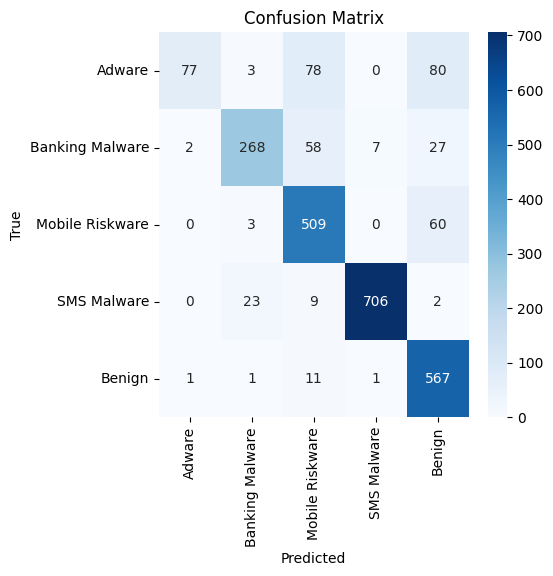

In [ ]:
modelG = MyModel()
modelG.load_state_dict(torch.load('final_model.pth'))
eval = evaluate_model(modelG, testloader)